In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
import tensorflow.keras as tk
import matplotlib.pyplot as plt
# import shap

In [3]:
# Load the dataset
data = pd.read_csv('music_features.csv')
print(data.shape)
print(data['genre'].unique())
print(data['genre'].nunique())
data.head()

(2500, 30)
['Pop' 'pop' 'Metal' 'metal' 'disco' 'NewAge' 'Blues' 'blues' 'Latin'
 'World' 'RnB' 'Reggae' 'reggae' 'Electronic' 'classical' 'Rock' 'rock'
 'Folk' 'hiphop' 'Punk' 'Country' 'country' 'Rap' 'Jazz' 'jazz']
25


,filename,genre,tempo,beats,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,Pop-TRWVLJG128F9307271.mp3,Pop,69.837416,34,0.408293,0.224007,2858.783819,2568.014706,5614.349384,0.157585,...,-2.239609,0.568685,-5.098747,5.126700,-6.031083,-0.664729,-5.482568,-0.785592,-0.707880,-2.069501
1,Pop-TROXCBC128F14529AE.mp3,Pop,129.199219,61,0.383293,0.116162,2588.175574,2546.518787,5442.600423,0.127652,...,-4.317134,3.003993,-2.611651,-4.571542,-4.442684,0.995466,-3.879921,1.871848,-3.352596,-1.624789
2,Pop-TRXFYTA128F429364C.mp3,Pop,143.554688,73,0.326810,0.174422,2263.045968,2466.713542,4915.211945,0.098146,...,-12.453062,1.115649,-6.475195,-2.844059,-11.737099,-5.944115,-9.832664,1.110383,-5.764701,-2.384817
3,Pop-TRKXVHR128F428B826.mp3,Pop,143.554688,70,0.364481,0.197582,1805.438441,2146.999805,3776.777162,0.078926,...,-0.345862,-11.273629,-6.434109,4.662772,-4.449849,-3.275714,-1.916390,-7.136373,-3.354441,-3.122026
4,Pop-TRYSIIR128F42333FF.mp3,Pop,89.102909,43,0.417577,0.296791,2622.265385,2567.002404,5549.991440,0.123443,...,0.335742,2.190076,-1.105045,0.857418,-1.936657,0.905115,-4.770248,-1.962681,-5.928404,3.378405


In [4]:
gen = data['genre'].str.lower()
data['genre'] = gen
print(data['genre'].unique())
print(data['genre'].nunique())

['pop' 'metal' 'disco' 'newage' 'blues' 'latin' 'world' 'rnb' 'reggae'
 'electronic' 'classical' 'rock' 'folk' 'hiphop' 'punk' 'country' 'rap'
 'jazz']
18


In [5]:
# Encode the genre labels and get label dictionary
genre_encoder = LabelEncoder()
genre_dictionary = dict(zip(genre_encoder.fit_transform(data['genre']), data['genre']))
print(genre_dictionary)
data['genre'] = genre_encoder.fit_transform(data['genre'])
data

{11: 'pop', 9: 'metal', 3: 'disco', 10: 'newage', 0: 'blues', 8: 'latin', 17: 'world', 15: 'rnb', 14: 'reggae', 4: 'electronic', 1: 'classical', 16: 'rock', 5: 'folk', 6: 'hiphop', 12: 'punk', 2: 'country', 13: 'rap', 7: 'jazz'}


,filename,genre,tempo,beats,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,Pop-TRWVLJG128F9307271.mp3,11,69.837416,34,0.408293,0.224007,2858.783819,2568.014706,5614.349384,0.157585,...,-2.239609,0.568685,-5.098747,5.126700,-6.031083,-0.664729,-5.482568,-0.785592,-0.707880,-2.069501
1,Pop-TROXCBC128F14529AE.mp3,11,129.199219,61,0.383293,0.116162,2588.175574,2546.518787,5442.600423,0.127652,...,-4.317134,3.003993,-2.611651,-4.571542,-4.442684,0.995466,-3.879921,1.871848,-3.352596,-1.624789
2,Pop-TRXFYTA128F429364C.mp3,11,143.554688,73,0.326810,0.174422,2263.045968,2466.713542,4915.211945,0.098146,...,-12.453062,1.115649,-6.475195,-2.844059,-11.737099,-5.944115,-9.832664,1.110383,-5.764701,-2.384817
3,Pop-TRKXVHR128F428B826.mp3,11,143.554688,70,0.364481,0.197582,1805.438441,2146.999805,3776.777162,0.078926,...,-0.345862,-11.273629,-6.434109,4.662772,-4.449849,-3.275714,-1.916390,-7.136373,-3.354441,-3.122026
4,Pop-TRYSIIR128F42333FF.mp3,11,89.102909,43,0.417577,0.296791,2622.265385,2567.002404,5549.991440,0.123443,...,0.335742,2.190076,-1.105045,0.857418,-1.936657,0.905115,-4.770248,-1.962681,-5.928404,3.378405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,jazz.00027.au,7,143.554688,68,0.325170,0.040594,1769.428268,2113.360398,3966.439331,0.062681,...,-10.986870,11.923827,-3.433859,7.191704,-8.850467,4.982307,-4.036403,-0.111063,-0.818210,-0.612190
2496,jazz.00076.au,7,117.453835,56,0.303217,0.119098,1733.735682,2068.216050,3379.971802,0.068700,...,-3.630606,-5.505905,0.538993,-0.509386,-4.806393,-11.206601,-3.936800,-1.469241,-4.413507,-10.597857
2497,jazz.00085.au,7,80.749512,38,0.325428,0.071379,2860.683151,2566.170784,5605.161054,0.147559,...,6.401213,3.414421,-2.899613,3.227199,-1.338827,0.875506,3.679272,0.648434,-0.353716,6.321081
2498,jazz.00042.au,7,73.828125,34,0.285201,0.099492,1344.620126,1548.989660,2773.095193,0.061186,...,-7.660741,-1.378526,-9.349154,-7.501379,-2.871112,-6.142300,-0.939825,-1.298267,-2.241966,-3.270761


In [6]:
# Group the data by genre
grouped = data.groupby("genre")

# Initialize variables for the overall training and test data
X_train = []
y_train = []
X_test = []
y_test = []

# Split each genre into training and test data
for genre, group in grouped:
    X_group = group.drop(["filename", "genre"], axis=1).values
    y_group = group["genre"]

    X_group_train, X_group_test, y_group_train, y_group_test = train_test_split(X_group, y_group, shuffle = True, test_size=0.2, random_state=99)

    X_train.extend(X_group_train)
    y_train.extend(y_group_train)
    X_test.extend(X_group_test)
    y_test.extend(y_group_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)

(2000, 28)
(500, 28)


In [7]:
# shuffle the dataset
y_train = y_train.reshape((len(y_train), 1))
xy = np.append(X_train, y_train, axis=1)
np.random.shuffle(xy)
print(xy)
X_train = xy[:,0:28]
y_train = xy[:,28]
print(y_train)

[[ 1.17453835e+02  5.90000000e+01  3.76455277e-01 ... -3.82016134e+00
  -2.55309367e+00  4.00000000e+00]
 [ 1.43554688e+02  7.10000000e+01  3.68105114e-01 ... -7.04697561e+00
  -3.53655720e+00  1.40000000e+01]
 [ 1.03359375e+02  5.00000000e+01  3.61405969e-01 ... -3.18090081e+00
  -2.29602194e+00  1.60000000e+01]
 ...
 [ 9.93840144e+01  4.90000000e+01  4.64274526e-01 ... -7.12449169e+00
  -1.25696468e+00  6.00000000e+00]
 [ 9.22851562e+01  4.60000000e+01  4.00661141e-01 ...  2.29631948e+00
   5.63536473e-02  1.10000000e+01]
 [ 1.61499023e+02  7.60000000e+01  4.68696594e-01 ... -1.10498941e+00
   3.97059202e+00  1.60000000e+01]]
[ 4. 14. 16. ...  6. 11. 16.]


In [8]:
y_test = y_test.reshape((len(y_test), 1))
xy_test = np.append(X_test, y_test, axis=1)
np.random.shuffle(xy_test)
print(xy_test)
X_test = xy_test[:,0:28]
y_test = xy_test[:,28]
print(y_test)

[[ 1.61499023e+02  7.70000000e+01  3.89906377e-01 ... -8.46900654e+00
  -6.87238336e-01  5.00000000e+00]
 [ 1.23046875e+02  5.80000000e+01  4.69705909e-01 ... -5.35381548e-02
  -2.28573704e+00  9.00000000e+00]
 [ 1.43554688e+02  7.20000000e+01  3.41324687e-01 ... -7.75592279e+00
   5.32694817e+00  1.70000000e+01]
 ...
 [ 6.62560096e+01  3.10000000e+01  4.07622963e-01 ...  4.39210027e-01
   4.94409657e+00  1.50000000e+01]
 [ 1.12347147e+02  5.60000000e+01  4.28204298e-01 ... -1.56173694e+00
  -3.24070597e+00  9.00000000e+00]
 [ 1.12347147e+02  5.40000000e+01  4.33407456e-01 ...  4.46937323e+00
   4.19866562e+00  1.10000000e+01]]
[ 5.  9. 17.  9.  2. 16.  7.  5. 14. 11. 14. 12.  8.  0.  6.  9. 14.  8.
  6. 11. 17. 11. 14.  2.  9.  4. 16. 15.  9.  9.  0. 10. 10. 14. 11.  7.
 12. 10. 10. 14.  7. 17. 15. 13. 14. 11. 11.  3.  4.  2. 16.  5. 16. 12.
 16. 16.  7.  2.  2. 13.  7.  1.  2.  9.  9.  7.  2.  9.  4. 13.  7. 16.
  9. 11.  1.  0. 15.  7.  6. 14. 13.  0.  2.  7.  2.  8.  4. 11.  2. 11.

In [9]:
# standard scale training dataset and testing dataset
center = StandardScaler().fit(X_train)
X_train_center = center.transform(X_train)
X_test_center = center.transform(X_test)

In [10]:
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop, Ftrl
from tensorflow.keras.regularizers import l2
import csv

In [11]:
header = 'acc layer1 layer2 layer3 regular momentum learningrate epoch batch valid verbose'
header = header.split()
print(header)

['acc', 'layer1', 'layer2', 'layer3', 'regular', 'momentum', 'learningrate', 'epoch', 'batch', 'valid', 'verbose']


In [39]:
# Dimension of features
n_features = X_train_center.shape[1]
r = 1e-4
# lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 20, verbose = 0, mode = 'auto', min_delta = 0.0001, cooldown = 5, min_lr = 1e-10)

model = tk.models.Sequential(name="Deep_Neural_Network", layers=[
    # tk.layers.Dense(input_dim = n_features, units = 64, kernel_regularizer=l2(r)),
    # tk.layers.BatchNormalization(),
    # tk.layers.ReLU(),
    tk.layers.Dense(input_dim = n_features, units = 128, activation = 'relu'),
    tk.layers.BatchNormalization(),
    # tk.layers.ReLU(),
    tk.layers.Dense(units = 128, activation = 'relu'),
    tk.layers.BatchNormalization(),
    ##tk.layers.ReLU(),
    tk.layers.Dense(units = 128, activation = 'relu'),
    tk.layers.BatchNormalization(),
    # tk.layers.ReLU(),
    tk.layers.Dense(units = 128, kernel_regularizer=l2(r)),
    tk.layers.BatchNormalization(),
    # tk.layers.ReLU(),
    # tk.layers.Dense(units = 256, kernel_regularizer=l2(r)),
    # tk.layers.BatchNormalization(),
    # tk.layers.ReLU(),
    # tk.layers.Dense(units = 512, kernel_regularizer=l2(r)),
    # tk.layers.BatchNormalization(),
    # tk.layers.ReLU(),
    # tk.layers.Dense(units = 512, kernel_regularizer=l2(r)),
    # tk.layers.BatchNormalization(),
    # tk.layers.ReLU(),
    # tk.layers.Dropout(0.5),
    # tk.layers.ReLU(),
    tk.layers.Dense(name = "output", units = 18, activation= tf.nn.softmax)
])

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adadelta(learning_rate=.1),metrics=['accuracy'])

history = model.fit(X_train_center, y_train, epochs=250, batch_size=64, validation_data=(X_test_center, y_test))

Epoch 1/250


2023-10-29 22:00:17.926943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 3.3081 - accuracy: 0.0910

2023-10-29 22:00:31.967833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 24s 263ms/step - loss: 3.3081 - accuracy: 0.0910 - val_loss: 2.8311 - val_accuracy: 0.1240
Epoch 2/250
32/32 [==============================] - 1s 22ms/step - loss: 2.8666 - accuracy: 0.1660 - val_loss: 2.7727 - val_accuracy: 0.1420
Epoch 3/250
32/32 [==============================] - 1s 18ms/step - loss: 2.6070 - accuracy: 0.2160 - val_loss: 2.7113 - val_accuracy: 0.1740
Epoch 4/250
32/32 [==============================] - 1s 18ms/step - loss: 2.4581 - accuracy: 0.2575 - val_loss: 2.6452 - val_accuracy: 0.1980
Epoch 5/250
32/32 [==============================] - 1s 18ms/step - loss: 2.3340 - accuracy: 0.2895 - val_loss: 2.5716 - val_accuracy: 0.2260
Epoch 6/250
32/32 [==============================] - 1s 20ms/step - loss: 2.2486 - accuracy: 0.3120 - val_loss: 2.5009 - val_accuracy: 0.2580
Epoch 7/250
32/32 [==============================] - 1s 18ms/step - loss: 2.1701 - accuracy: 0.3435 - val_loss: 2.4416 - val_accuracy: 0.2800
Epoch 8/250
32/3

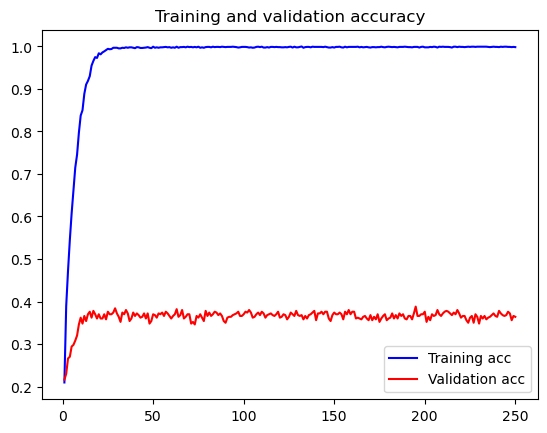

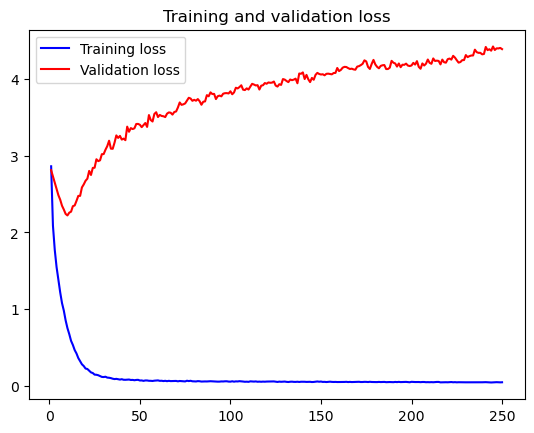

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()